In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [3]:
data = load_breast_cancer()
X,y = data.data, data.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [5]:
clf = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    learning_rate = .1,
    subsample = .8,
    colsample_bytree = .8,
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    random_state = 42
)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [6]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [7]:
print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
confusion_matrix(y_test,y_pred)

array([[39,  3],
       [ 1, 71]])

In [9]:
importance = pd.Series(clf.feature_importances_,
index=data.feature_names).sort_values(ascending=False)

In [10]:
# Early stopping (Overfitting control)
d_train = xgb.DMatrix(X_train,label=y_train)
d_test = xgb.DMatrix(X_test, label= y_test)

In [11]:
param_dist = {
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'max_depth':3,
    'eta':.05,
    'subsample':.8,
    'colsample_bytree':.8,
    'seed':42
}

model = xgb.train(
    params=param_dist,
    dtrain = d_train,
    num_boost_round = 500,
    evals = [(d_test,'eval')],
    early_stopping_rounds = 20
    )

[0]	eval-logloss:0.61842
[1]	eval-logloss:0.58321
[2]	eval-logloss:0.55118
[3]	eval-logloss:0.52107
[4]	eval-logloss:0.49499
[5]	eval-logloss:0.46992
[6]	eval-logloss:0.44595
[7]	eval-logloss:0.42666
[8]	eval-logloss:0.40680
[9]	eval-logloss:0.38943
[10]	eval-logloss:0.37400
[11]	eval-logloss:0.35835
[12]	eval-logloss:0.34524
[13]	eval-logloss:0.33193
[14]	eval-logloss:0.31992
[15]	eval-logloss:0.30864
[16]	eval-logloss:0.29739
[17]	eval-logloss:0.28778
[18]	eval-logloss:0.27658
[19]	eval-logloss:0.26695
[20]	eval-logloss:0.25816
[21]	eval-logloss:0.24982
[22]	eval-logloss:0.24283
[23]	eval-logloss:0.23469
[24]	eval-logloss:0.22616
[25]	eval-logloss:0.22023
[26]	eval-logloss:0.21337
[27]	eval-logloss:0.20585
[28]	eval-logloss:0.20067
[29]	eval-logloss:0.19505
[30]	eval-logloss:0.19082
[31]	eval-logloss:0.18615
[32]	eval-logloss:0.18120
[33]	eval-logloss:0.17770
[34]	eval-logloss:0.17333
[35]	eval-logloss:0.16917
[36]	eval-logloss:0.16477
[37]	eval-logloss:0.16097
[38]	eval-logloss:0.15

In [12]:
y_pred = model.predict(d_test)
r2_score(y_test,y_pred)

0.8773459196090698

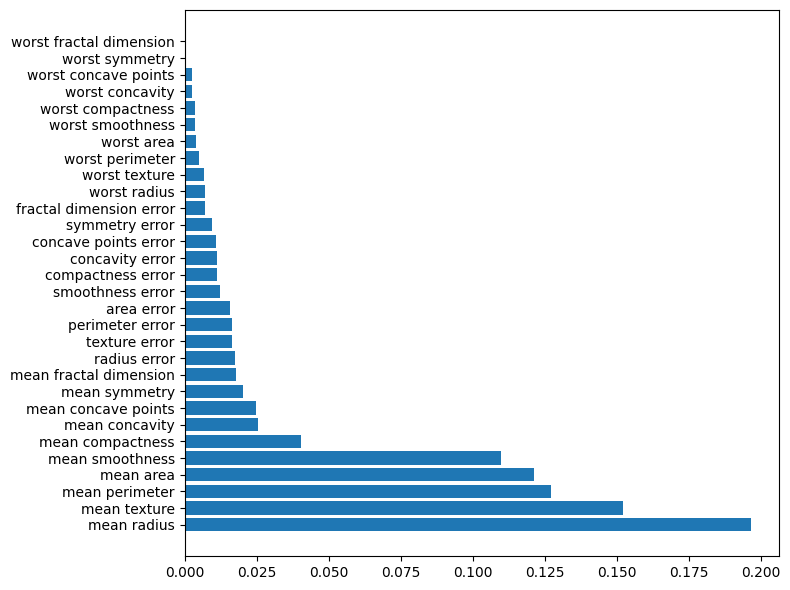

In [13]:
plt.figure(figsize=(8,6))
plt.barh(data.feature_names,importance)
plt.tight_layout()
plt.show()